### Imports & Options

In [1]:
%load_ext autoreload
%autoreload 2

In [124]:
import numpy as np
import pandas as pd
import osmnx as ox
import networkx as nx
from networkx import NetworkXNoPath
import matplotlib.pyplot as plt
from cartopy import crs

In [145]:
from src.directories import DATA_DIR, PLOTS_DIR
from src import rides, graph, utils

### Data

In [88]:
chicago = graph.download_biking_network()
df = rides.load_data()

### Bicycle Trips

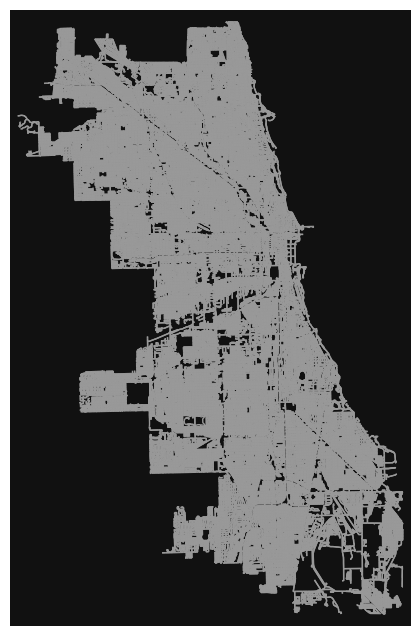

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
ox.plot_graph(chicago, node_size=0)

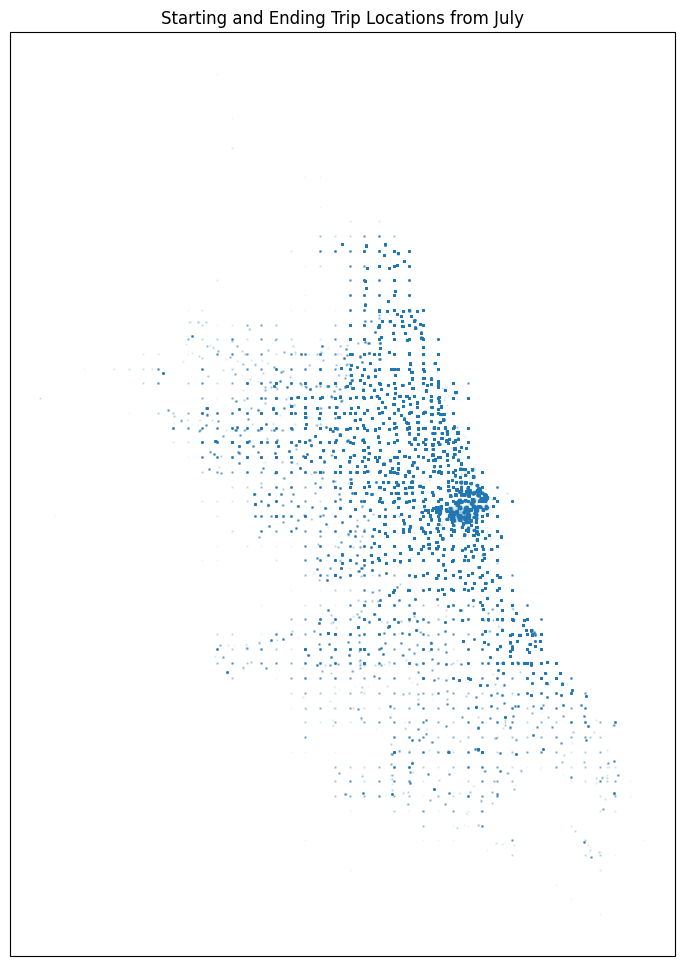

In [48]:
ccrs = crs.PlateCarree(central_longitude=df["start_lng"].mean())

fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection = ccrs)

size = 0.5
alpha = 0.05
df.plot.scatter("start_lng", "start_lat", ax=ax, s=size, alpha=alpha)
df.plot.scatter("end_lng", "end_lat", ax=ax, s=size, alpha=alpha)

ax.set_title("Starting and Ending Trip Locations from July");
# plt.savefig("july-trips-under-two-hours.png", dpi=300);

### Sample the Data

In [89]:
# sampling 7000 trips will be just under 1% of the data from July
one_percent = df.shape[0] // 100
sample = df.sample(one_percent, random_state=42)

In [90]:
sample["start_node"] = graph.nearest_nodes(chicago, sample["start_lat"], sample["start_lng"])
sample["end_node"] = graph.nearest_nodes(chicago, sample["end_lat"], sample["end_lng"])

In [91]:
sample.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,same_start_and_end,duration,seconds,distance,start_node,end_node
35262,6BD29E84CE03CFD6,electric_bike,2023-07-21 17:11:16,2023-07-21 17:30:01,Mies van der Rohe Way & Chestnut St,15529,Broadway & Belmont Ave,13277,41.898537,-87.622647,41.940106,-87.645451,member,False,0 days 00:18:45,1125,3.102214,1665788208,5495591274
625591,CD2B862721095E3D,electric_bike,2023-07-06 19:58:06,2023-07-06 20:07:04,Streeter Dr & Grand Ave,13022,NaN,NaN,41.892305,-87.612140,41.890000,-87.610000,casual,False,0 days 00:08:58,538,0.193584,1052680038,6391910354
391129,164B3A177F8E6168,docked_bike,2023-07-02 19:16:51,2023-07-02 19:29:18,Millennium Park,13008,Michigan Ave & Washington St,13001,41.881032,-87.624084,41.883984,-87.624684,casual,False,0 days 00:12:27,747,0.206285,27446490,619011842
362760,7D38ABB0B4AA26C5,classic_bike,2023-07-19 18:06:04,2023-07-19 18:24:11,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,Damen Ave & Charleston St,13288,41.932588,-87.636427,41.920082,-87.677855,member,False,0 days 00:18:07,1087,2.298257,259383173,261244379
673719,62927A95A65035C3,classic_bike,2023-07-12 06:37:27,2023-07-12 06:42:18,State St & Randolph St,TA1305000029,State St & Chicago Ave,21544,41.884621,-87.627834,41.896617,-87.628579,casual,False,0 days 00:04:51,291,0.829736,10929181418,27440586


In [133]:
def shortest_path(start_node, end_node):
    try:
        return nx.shortest_path(chicago, start_node, end_node)
    except NetworkXNoPath:
        return None

sample["route"] = sample.apply(
    lambda row: shortest_path(row["start_node"], row["end_node"]),
    axis=1,
)

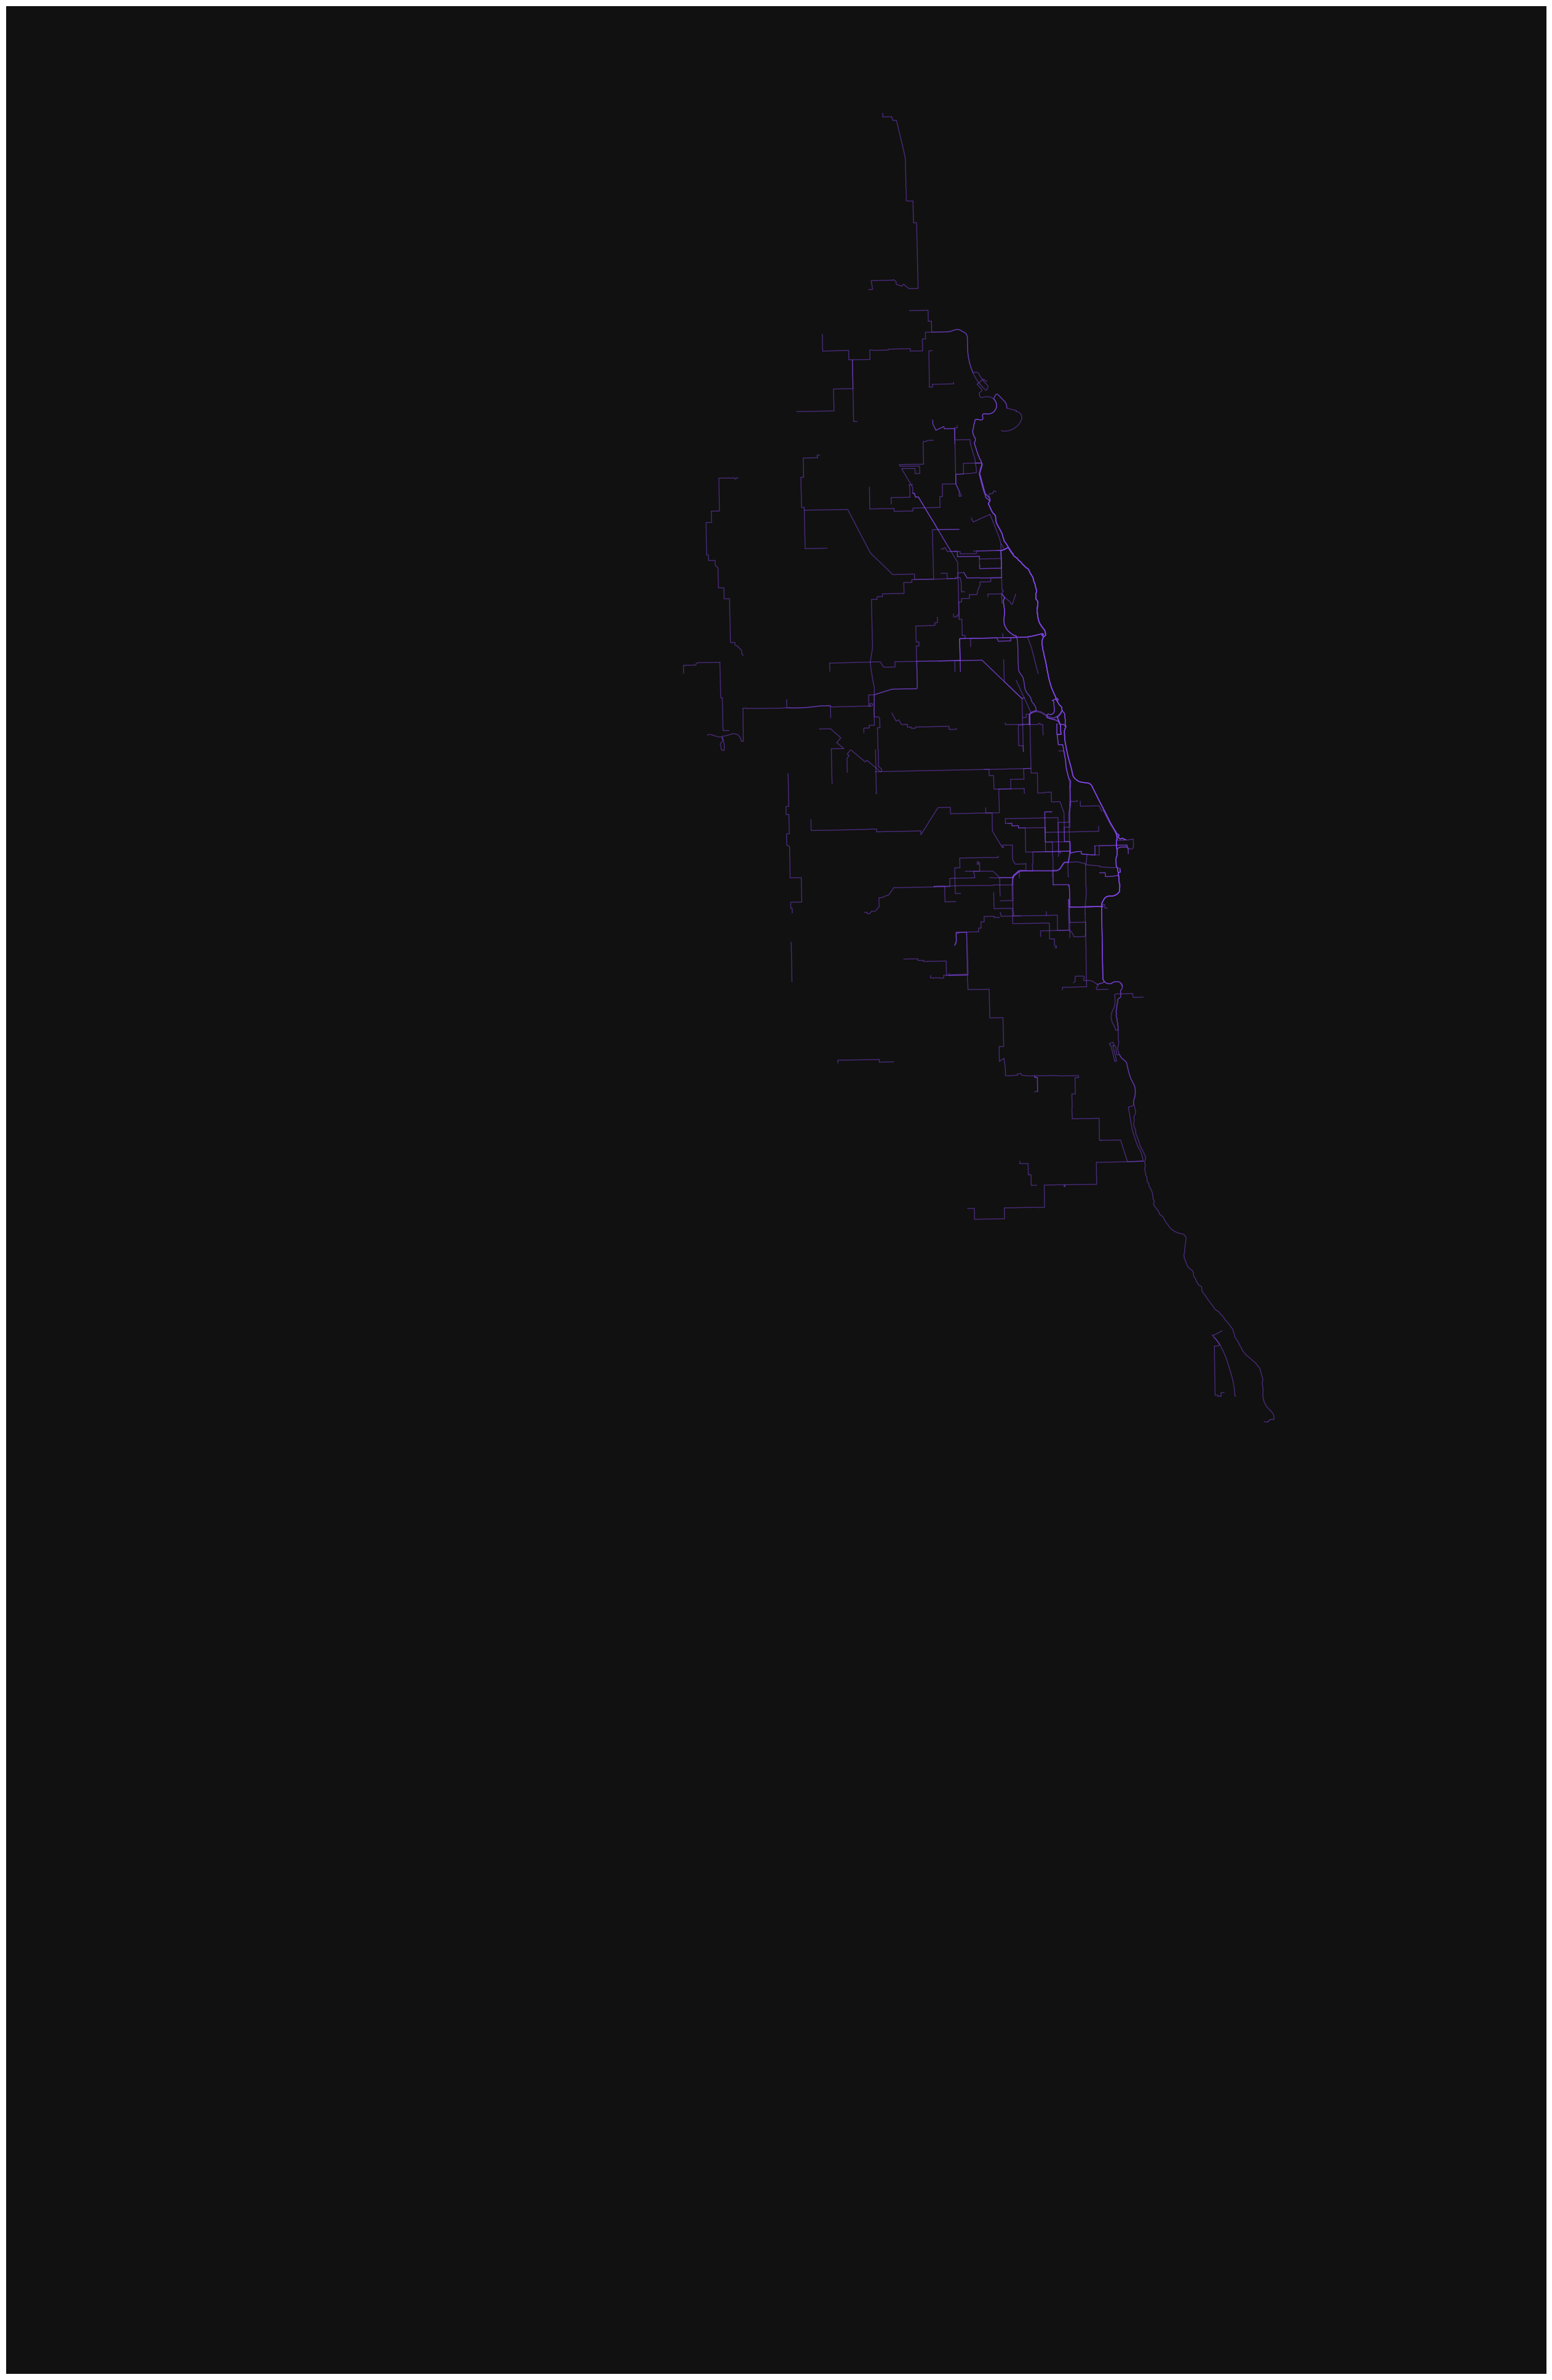

(<Figure size 5000x5000 with 1 Axes>, <Axes: >)

In [146]:
sample_size = 100
routes = sample.head(sample_size)["route"].dropna()
routes = routes.values.tolist()

ox.plot_graph_routes(chicago, routes, figsize=(50,50), 
                     node_size=0, 
                     edge_linewidth=1, edge_alpha=0, edge_color="#232527",
                     orig_dest_size=0,
                     route_linewidths=1, route_colors="#8045e4", route_alpha=0.5,
                     save=True, filepath = PLOTS_DIR / f"estimated-routes_{sample_size}-count.png", dpi=300,
                    )

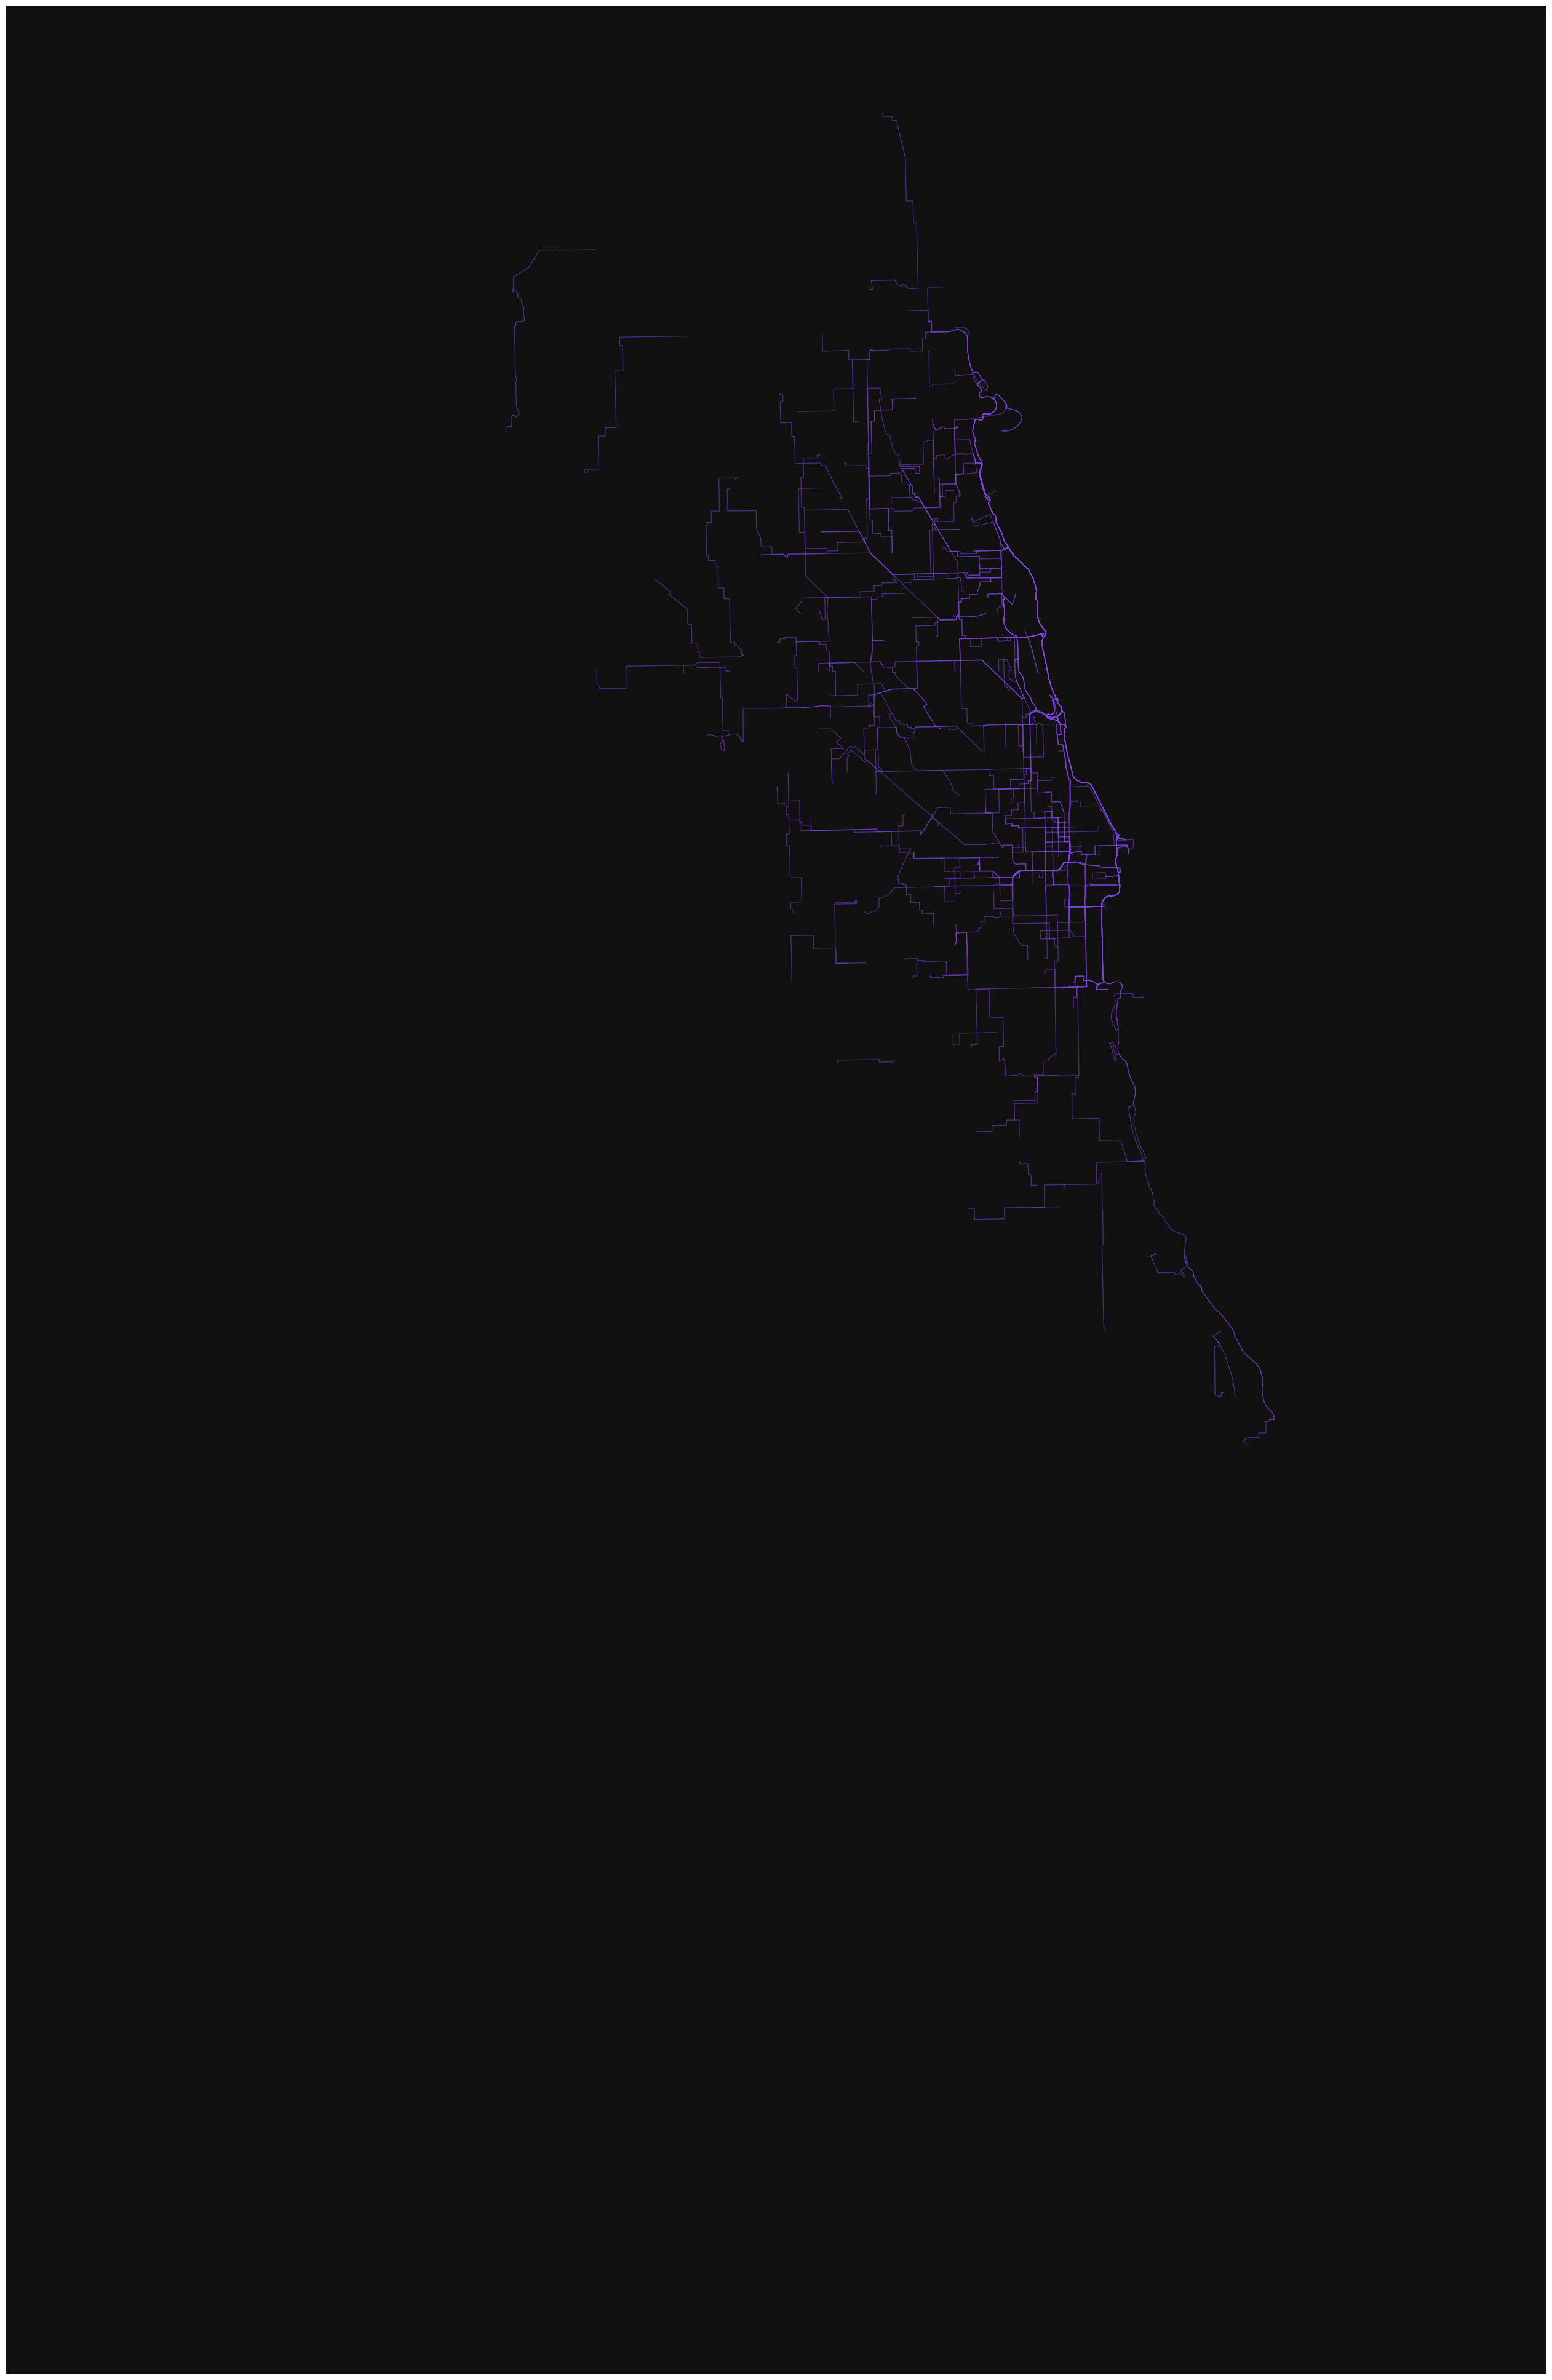

(<Figure size 5000x5000 with 1 Axes>, <Axes: >)

In [147]:
sample_size = 200
routes = sample.head(sample_size)["route"].dropna()
routes = routes.values.tolist()

ox.plot_graph_routes(chicago, routes, figsize=(50,50), 
                     node_size=0, 
                     edge_linewidth=1, edge_alpha=0, edge_color="#232527",
                     orig_dest_size=0,
                     route_linewidths=1, route_colors="#8045e4", route_alpha=0.5,
                     save=True, filepath = PLOTS_DIR / f"estimated-routes_{sample_size}-count.png", dpi=300,
                    )

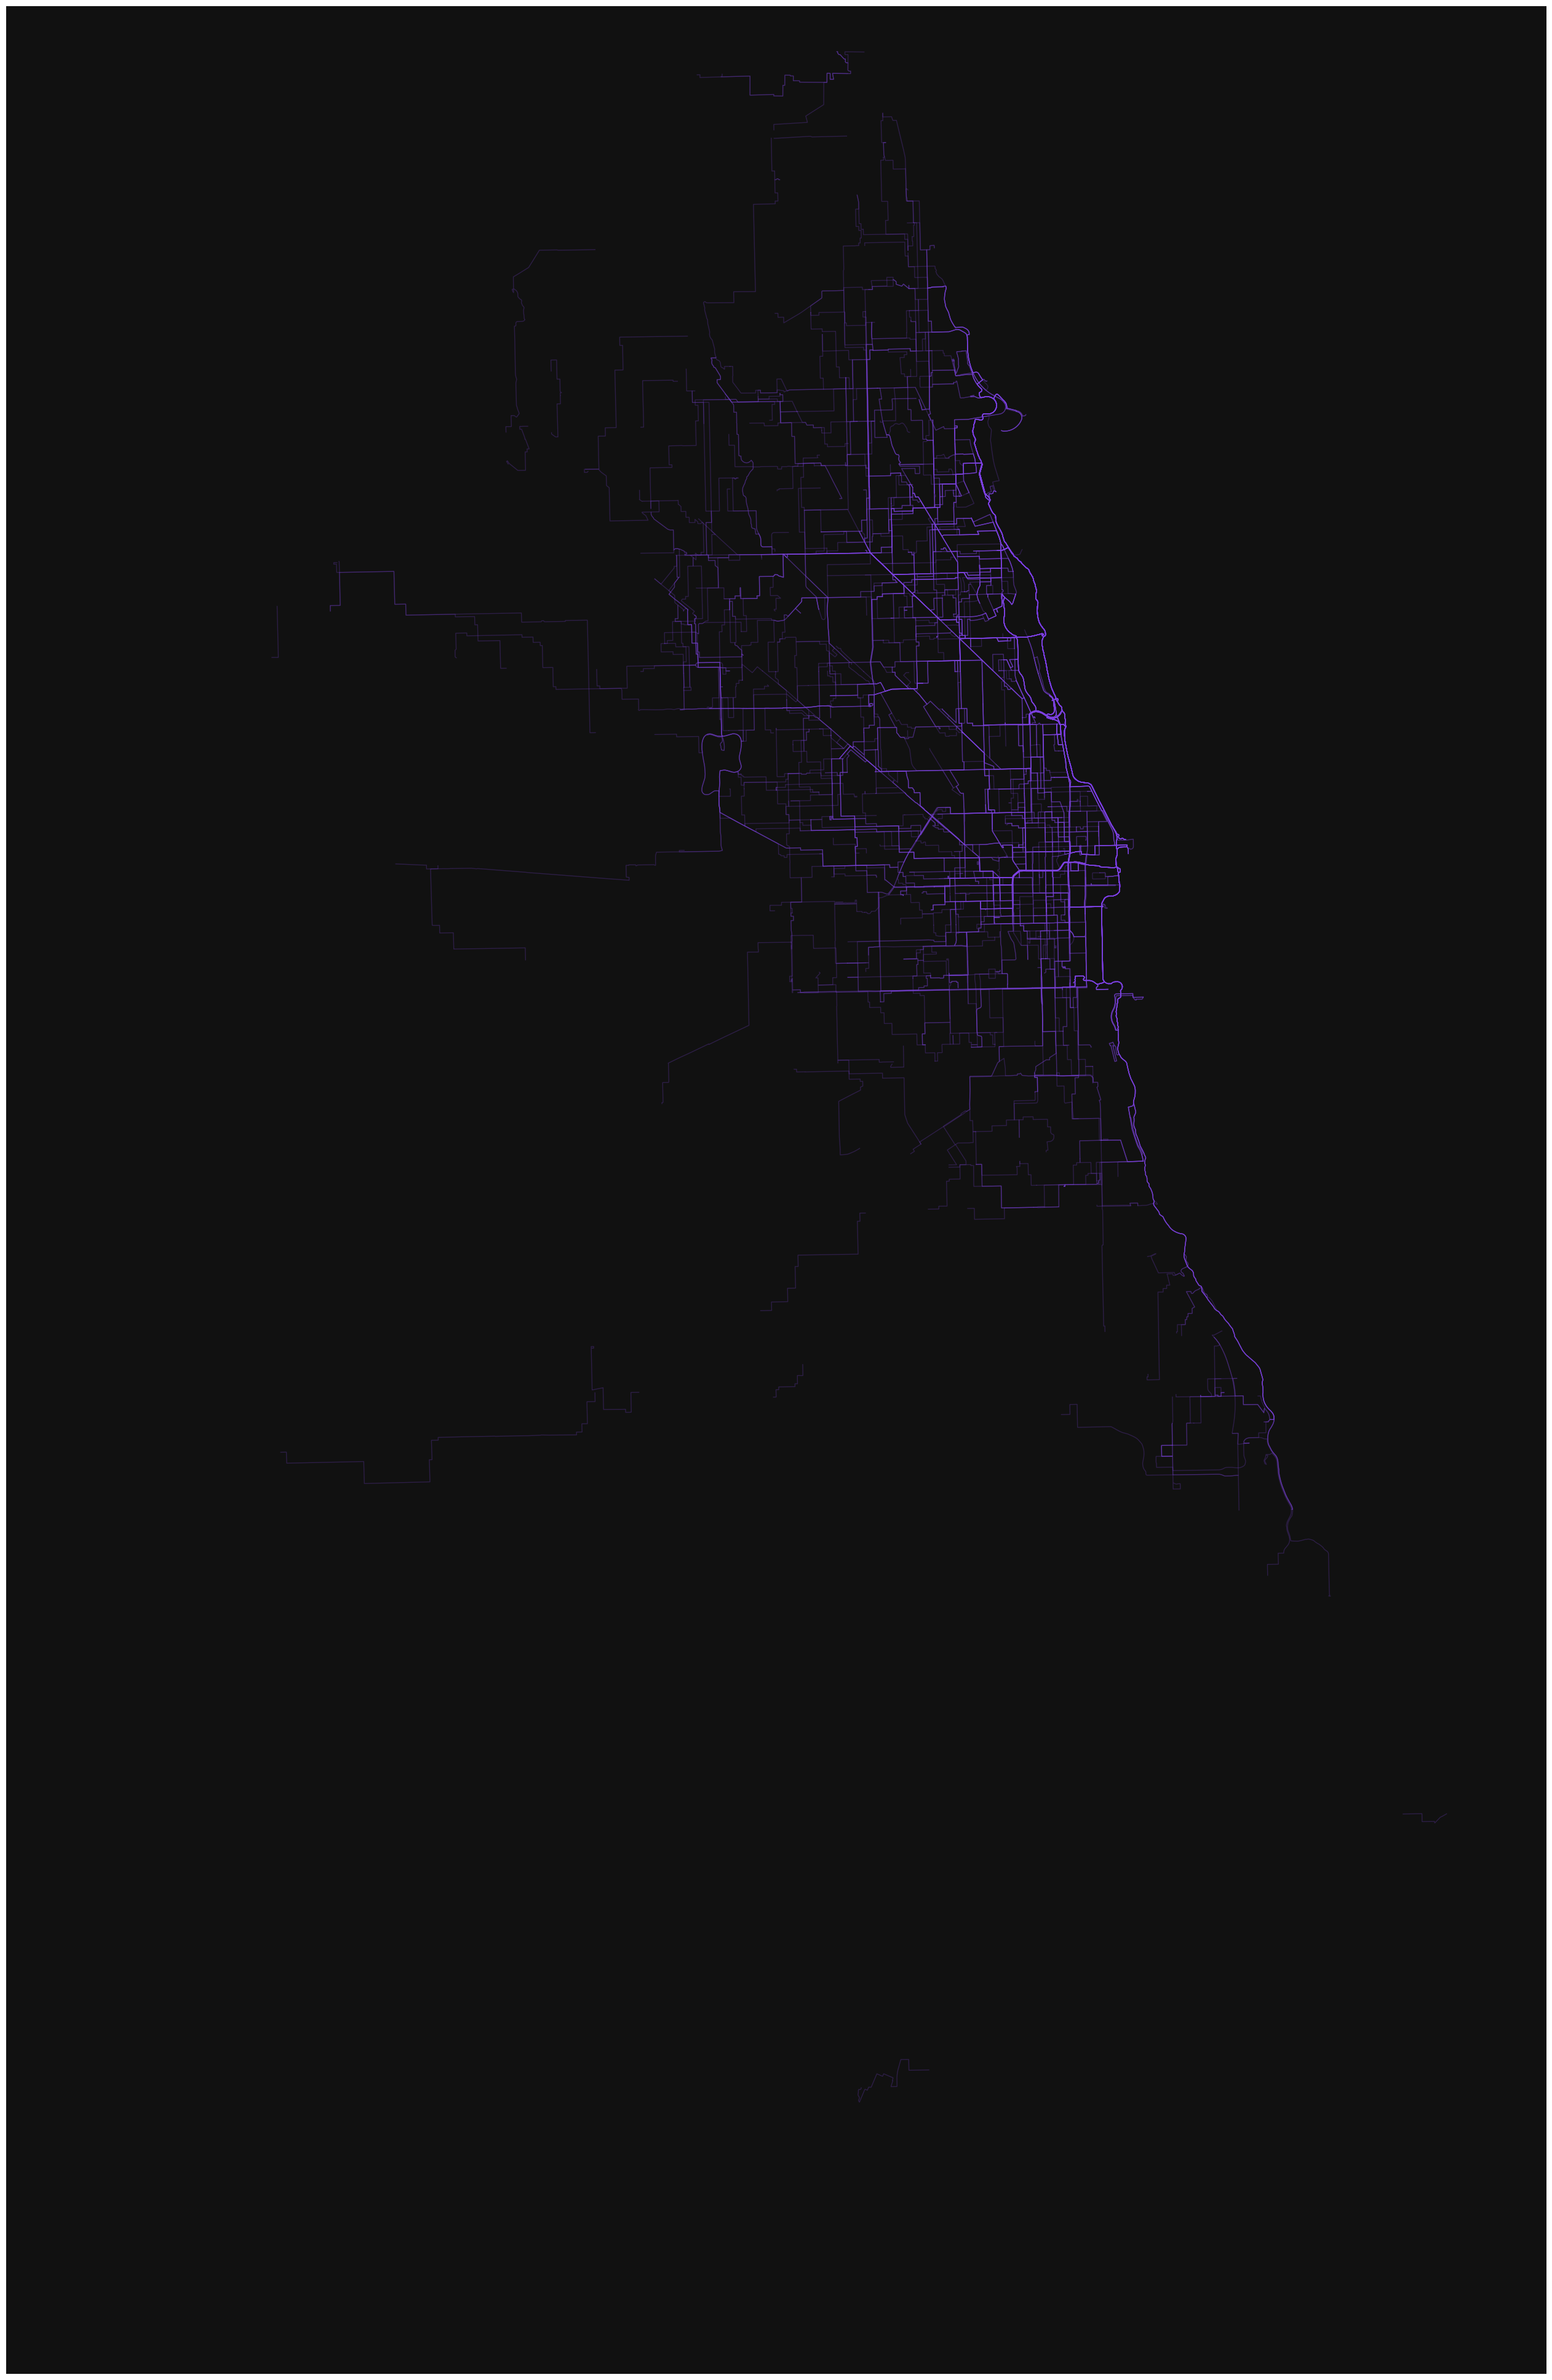

(<Figure size 5000x5000 with 1 Axes>, <Axes: >)

In [150]:
sample_size = 1000
routes = sample.head(sample_size)["route"].dropna()
routes = routes.values.tolist()

ox.plot_graph_routes(chicago, routes, figsize=(50,50), 
                     node_size=0, 
                     edge_linewidth=1, edge_alpha=0, edge_color="#232527",
                     orig_dest_size=0,
                     route_linewidths=1, route_colors="#8045e4", route_alpha=0.25,
                     save=True, filepath = PLOTS_DIR / f"estimated-routes_{sample_size}-count_025-alpha.png", dpi=300,
                    )

KeyboardInterrupt: 

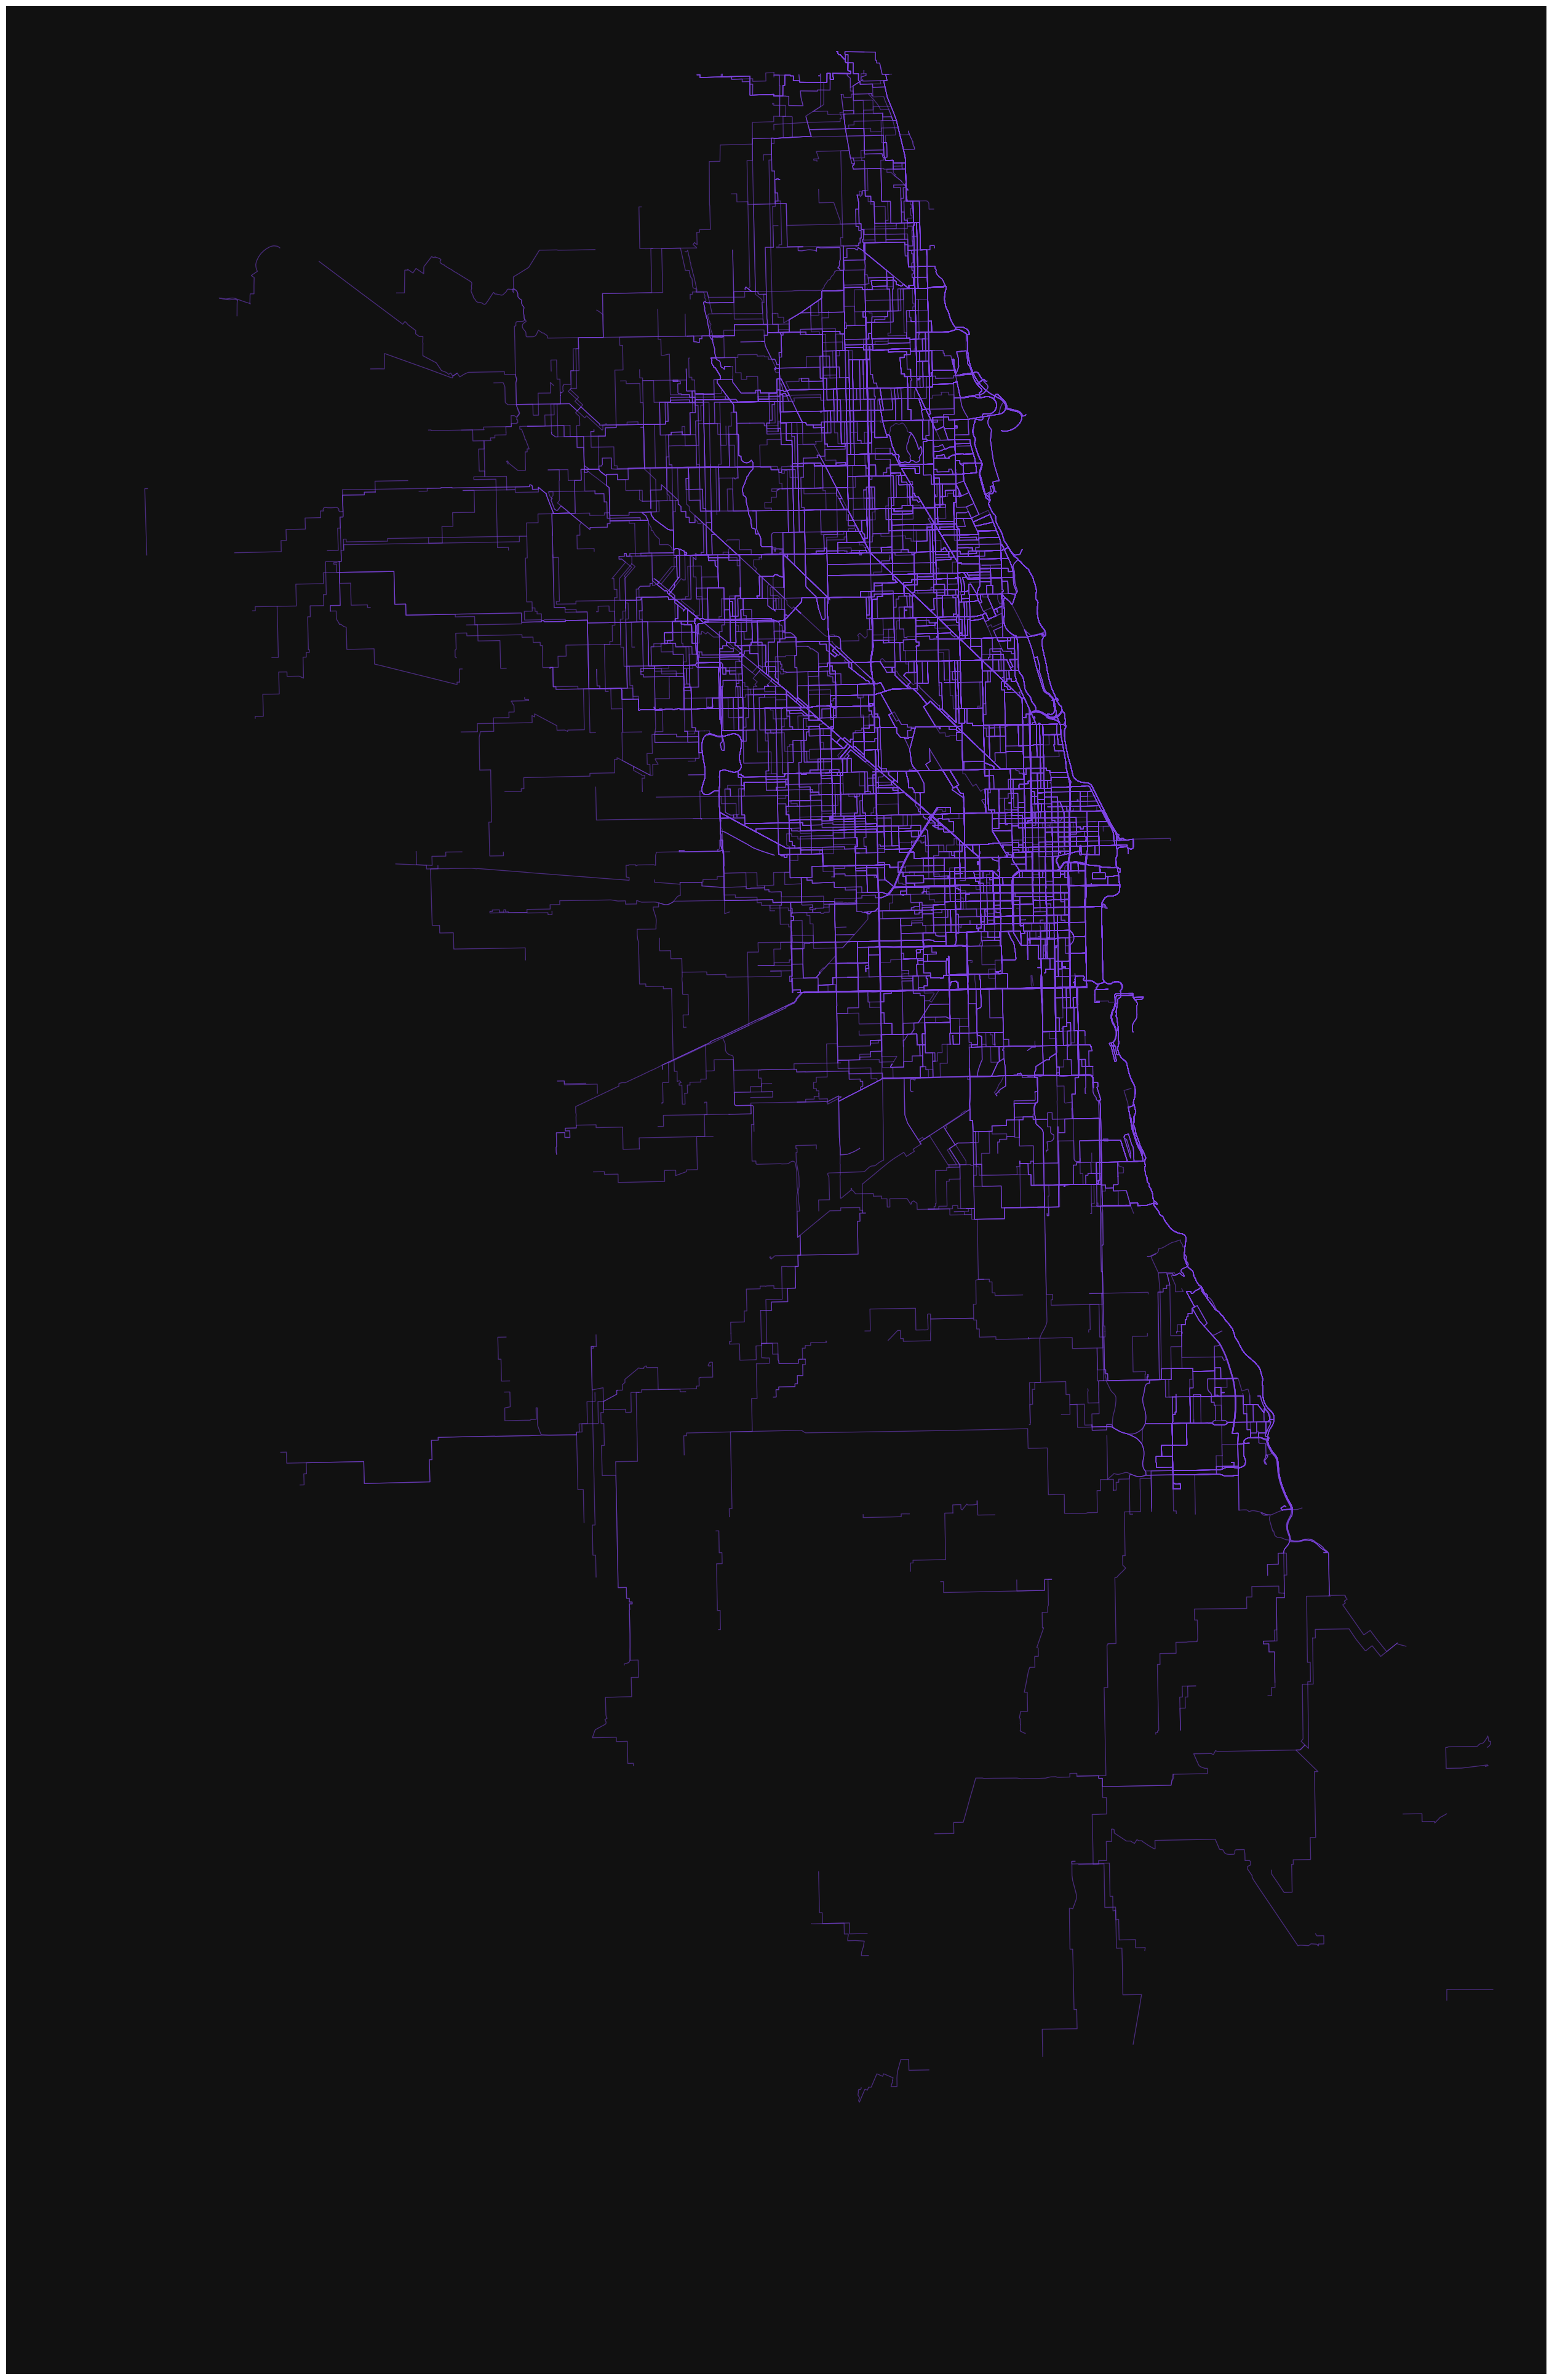

In [149]:
routes = sample["route"].dropna()
routes = routes.values.tolist()

ox.plot_graph_routes(chicago, routes, figsize=(50,50), 
                     node_size=0, 
                     edge_linewidth=1, edge_alpha=0, edge_color="#232527",
                     orig_dest_size=0,
                     route_linewidths=1, route_colors="#8045e4", route_alpha=0.5,
                     save=True, filepath = PLOTS_DIR / "estimated-routes.png", dpi=300,
                    )